# Evaluating the Effectiveness of Heterogeneous Ensemble Models Versus Homogeneous Models in Bank Customer Churn Prediction


##1.Problem Definition

The primary objective of the Bank Customer Churn Prediction project is to analyze the demographics and financial information of bank customers, including factors such as age, gender, credit score, country, balance, and more, to predict whether a customer will leave the bank. Customer churn, the decision of customers to leave a bank, can significantly impact the bank's business and profitability. By accurately predicting customer churn, the bank can take proactive measures to retain valuable customers and enhance customer satisfaction.

This project will compare the performance of heterogeneous ensemble models with single models in predicting bank customer churn. By leveraging the strengths of different algorithms, heterogeneous ensemble models aim to provide more robust and accurate predictions, which can help the bank implement effective retention strategies.

##2.About the Dataset

The dataset used in this project is sourced from [Kaggle](https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers?datasetId=797699&sortBy=voteCount) and comprises 10,000 rows and 14 columns. The dataset's primary objective is to predict whether a customer will churn (leave the bank) based on their demographics and financial information.

The dataset contains several independent variables, which are potential factors that may influence a customer's decision to leave the bank. These variables include customer-specific information such as:

- Credit Score: A numerical representation of the customer's creditworthiness.
Country (Geography): The country where the customer resides.
- Age: The age of the customer.
- Tenure: The number of years the customer has been with the bank.
- Bank Balance: The balance maintained by the customer in their bank account.
- Number of Products (NumOfProducts): The number of bank products the customer uses.
- Has Credit Card (HasCrCard): Indicates whether the customer holds a credit card (1 if they do, 0 if they do not).
- Is Active Member (IsActiveMember): Indicates whether the customer is an active member with the bank (1 if they are active, 0 if they are not).

The target variable, also known as the dependent variable, is labeled "Exited" and is represented by a binary flag: 1 if the customer closed their account with the bank and 0 if the customer is retained. This dataset will be used to evaluate the effectiveness of heterogeneous ensemble models versus single models in predicting bank customer churn.

##3.Data Inspection

In [26]:
# Import Libraries
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
from google.colab import files
uploaded = files.upload()

Saving churn.csv to churn (2).csv


In [28]:
# Load DefaultCreditCardClients.xls
import pandas as pd
file_path = 'churn.csv'
data = pd.read_csv(file_path)
display(data.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Check the shape of the dataset (#Rows, #Columns)
print("Shape of the dataset:")
print(data.shape)

Shape of the dataset:
(10000, 14)


In [5]:
# Understand the structure and content of the data
print("\nDataset Information:")
print(data.info())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [8]:
print("\nSummary Statistics:")
data.describe().T


Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [9]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [14]:
# Check any duplicated values
print("\nDuplicated Values:")
print(data.duplicated().sum())


Duplicated Values:
0


In [10]:
# Analyze the distribution of the target variable
print("\nTarget Variable Distribution (Exited):")
print(data['Exited'].value_counts())


Target Variable Distribution (Exited):
Exited
0    7963
1    2037
Name: count, dtype: int64


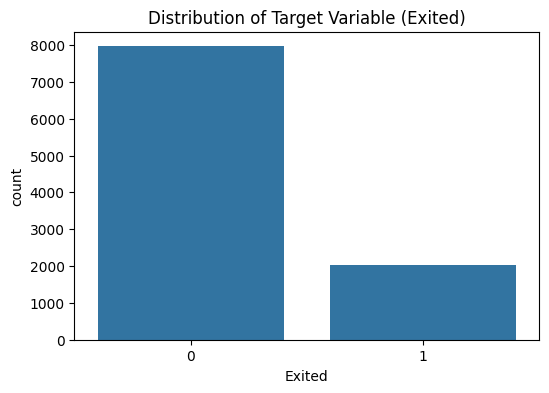

In [11]:
# Visualize the target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=data)
plt.title('Distribution of Target Variable (Exited)')
plt.show()

##4.Exploratory Data Analysis (EDA)

### Customer Churn (Exited)

In [4]:
#rename column
data.rename(columns={'Exited':'Churn'}, inplace=True)

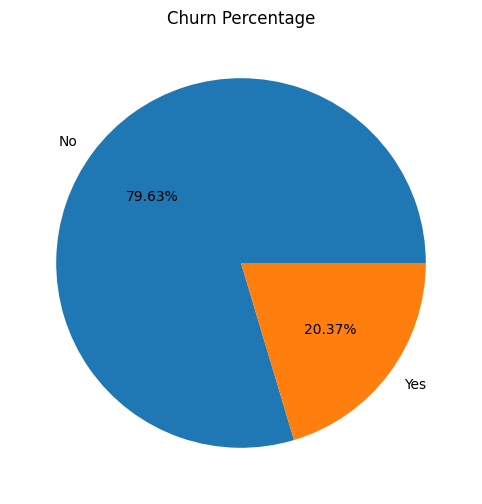

In [5]:
#pie chart
plt.figure(figsize=(10,6))
plt.pie(data['Churn'].value_counts(),labels=['No','Yes'],autopct='%1.2f%%')
plt.title('Churn Percentage')
plt.show()

The majority of the customers in the dataset continue to use the serivces of the bank with only 20.4% of the customers churning.

### Gender

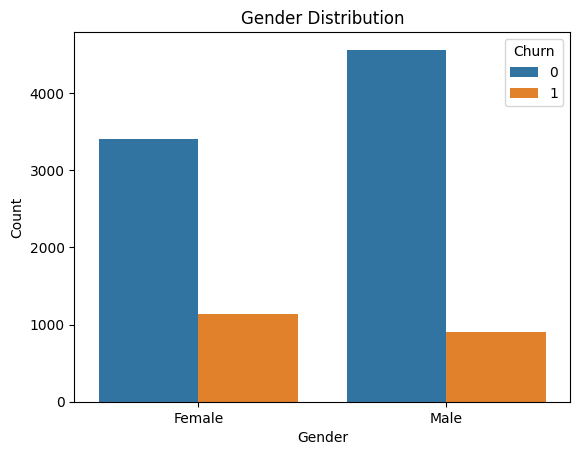

In [8]:
#gender and customer churn
sns.countplot(x = 'Gender', data = data, hue = 'Churn')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

As shown in the graph, majority of the customers are male. But upon looking at the customer churn, we can see that females have more tendency to churn as compared to males. However there is not much difference between the churn count of the two genders so we cannot have a hypothesis regarding the customer churn based on the gender of the customer.

### Age Distribution

<Axes: xlabel='Age', ylabel='Count'>

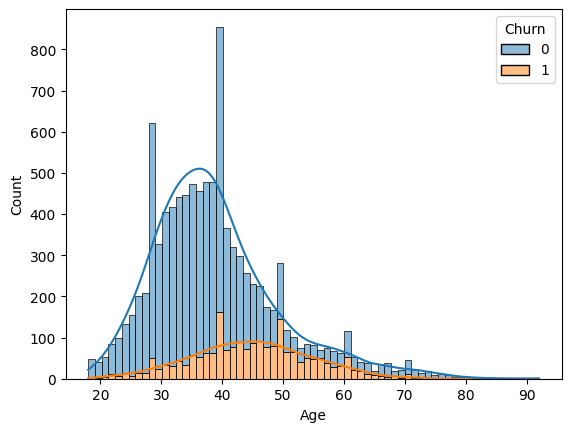

In [9]:
#histogram for age distribution
sns.histplot(data=data, x="Age", hue="Churn", multiple="stack",kde=True)

The majority of the customers are from age group 30-40 years old. However the customer churn count is highest for the customersof age 40 and 50. In addition to that customers from age group 20-25 years old count for the lowest churn count. Therefore, age plays a significant role in customer churn, where late adults are more likely to churn as compared to young adults with minimal churn count.

### Credit Score

<Axes: xlabel='Churn', ylabel='CreditScore'>

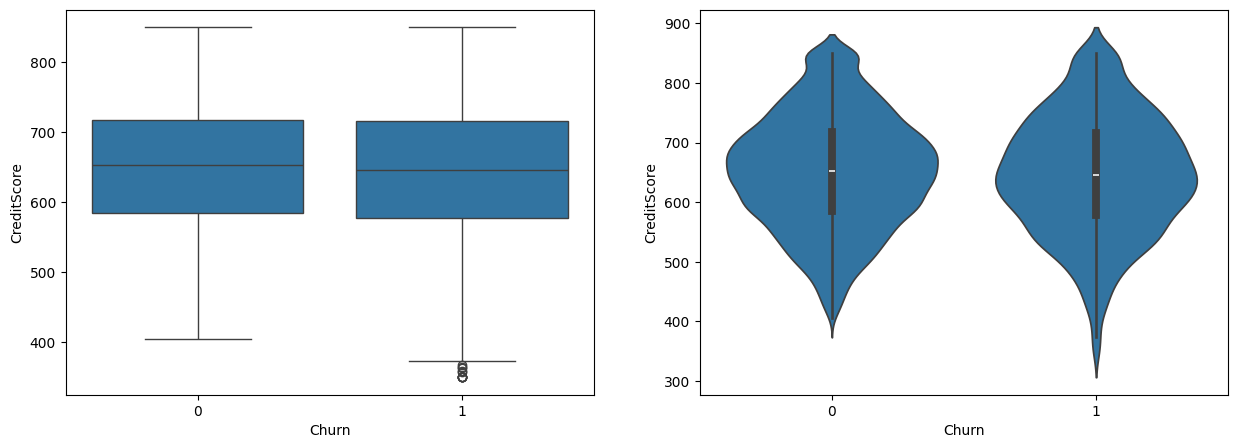

In [10]:
fig, ax = plt.subplots(1,2,figsize=(15, 5))
sns.boxplot(x="Churn", y="CreditScore", data=data, ax=ax[0])
sns.violinplot(x="Churn", y="CreditScore", data=data, ax=ax[1])

In the boxplot, the median of both the churn and non churn customers are almost same. In addition to that, the shape of violinplot is also similar for both the churn and non churn customers. However some churn customers have low credit score, but on the whole, the credit score is not a good indicator of churn.

### Customer location

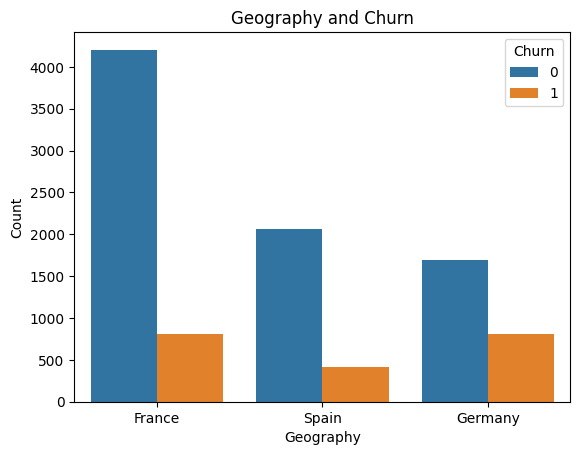

In [11]:
sns.countplot(x = 'Geography', hue = 'Churn', data = data)
plt.title('Geography and Churn')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

Majority of the customers are from France, followed by Spain and Germany. However in contrast to that Germany has the highest number of customer curn followed by France and Spain. From this we can infer that German customers are more likely to churn than the customers from other countries.

### Tenure

<Axes: xlabel='Tenure', ylabel='count'>

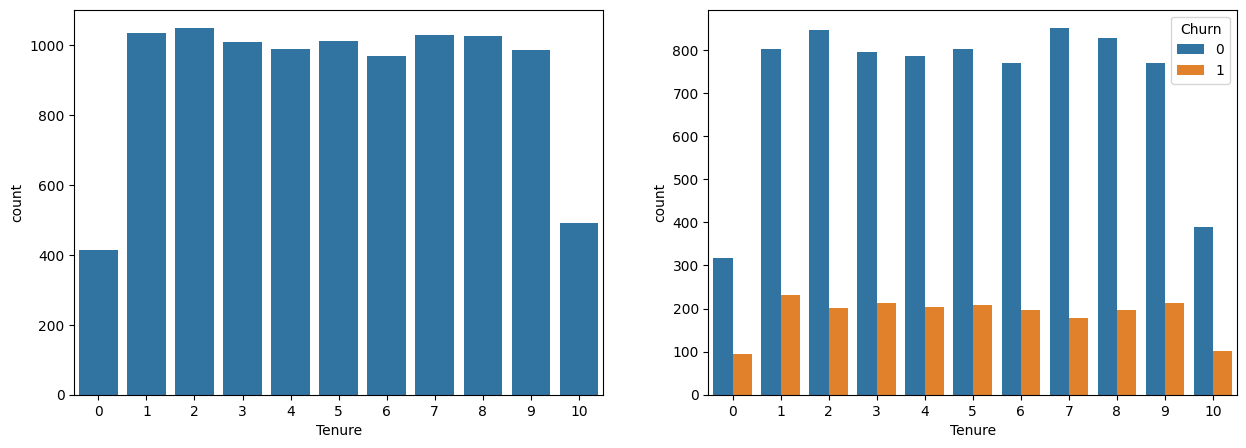

In [12]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Tenure', data=data,ax=ax[0])
sns.countplot(x='Tenure', hue='Churn', data=data,ax=ax[1])

Tensure refers to the time (in years) that a customer has been a client of the bank. Majority of the customers in the dataset have a tenure between 1-9 years, having equal distribution among them. There are very few customers with a tenure of less than 1 years or more than 9 years. Looking at the churn of these customers based on their tenure, it can be observed that customers with tenure 1-9 years have higher churn count with maximum in customers with 1 year tenure followed those with 9 year tenure. However customers more than 9 years on tenure counts for the least churn. This is because the customers with higher tenure are more loyal to the bank and less likely to churn.

### Bank Balance

<Axes: xlabel='Balance', ylabel='Count'>

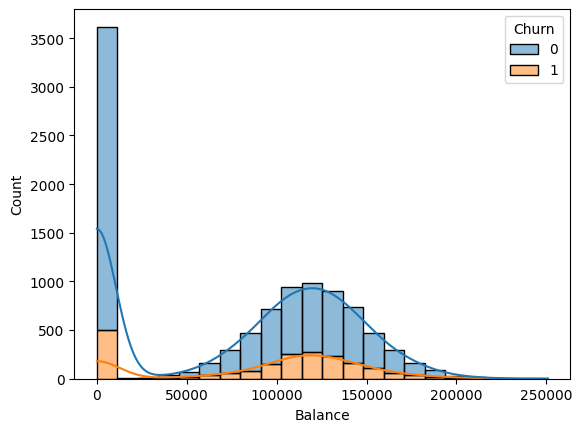

In [6]:
sns.histplot(data=data, x="Balance", hue="Churn", multiple="stack",kde=True)

A huge number of customers have zero bank balance which also resulted in them leaving the bank. However, customer having bank balance between 100000 to 150000 are more likely to leave the bank after the customers with zero bank balance.

### Number of products purchased

<Axes: xlabel='NumOfProducts', ylabel='count'>

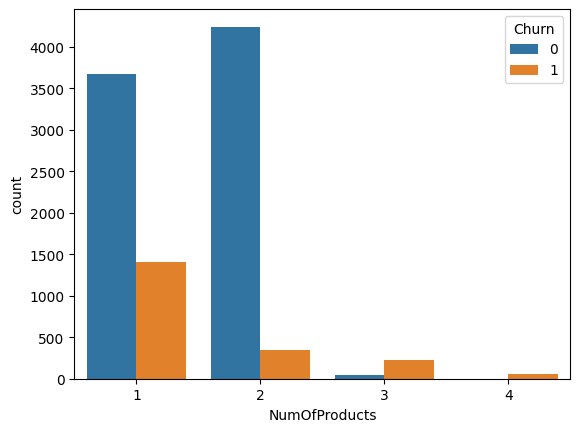

In [7]:
sns.countplot(x='NumOfProducts', hue='Churn', data=data)

The customers with purchase or 1 or 2 products are highest in number and have low churn count in comparison to the non churn customers in the category. However, in the category where customers have purchased 3 or 4 products the number of leaving customers is much higher than the non leaving customers. Therefore, the number of product purchased is a good indicator of customer churn.

### Customers with/without credit card

<Axes: xlabel='HasCrCard', ylabel='count'>

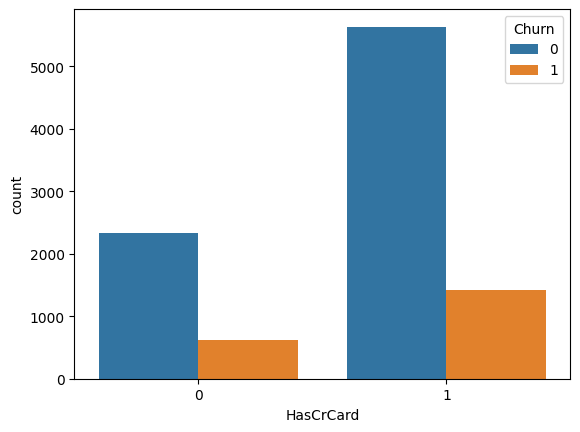

In [8]:
sns.countplot(x=data['HasCrCard'],hue=data['Churn'])

Majoity of the customers have credit cars i.e. nealy 70% of the customers have credit cards leaving 30% of the customers who do not have credit cards. Moreover, the number of customers leaving the bank are more whom have a credit card.

### Active Members

<Axes: xlabel='IsActiveMember', ylabel='count'>

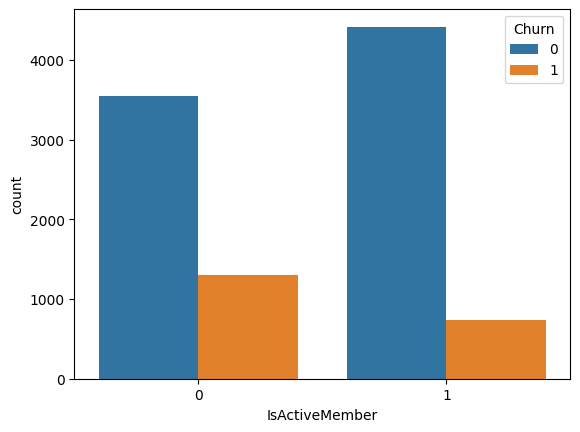

In [9]:
sns.countplot(x='IsActiveMember', hue='Churn', data=data)

As expected, the churn count is higher for non active members as compared to the active members of the bank. This is because the active members are more satisfied with the services of the bank and hence they are less likely to leave the bank. Therefore, the bank should focus on the non active members and try to improve their services to retain them.

### Estimated Salary

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

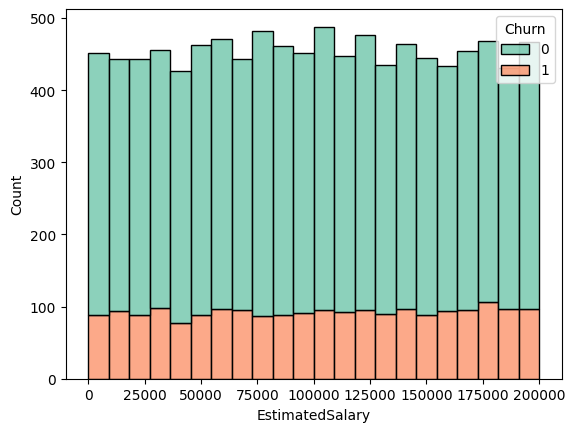

In [10]:
sns.histplot(data=data,x='EstimatedSalary',hue='Churn',multiple='stack',palette='Set2')

This graph shows the distribution of the estimated salary of the customers along with the churn count. On the whole the there is no definite pattern in the salary distribution of the customers who churned and who didn't. Therefore estimated salary is not a good predictor of churn.

##5.Data preprocessing

### Inspect the Dataset

In [29]:
#rename column
data.rename(columns={'Exited':'Churn'}, inplace=True)

In [30]:
# Display basic information about the dataset
print("\nDataset Information:")
print(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Churn            10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [31]:
# Summary statistics of the dataset
print("\nSummary Statistics:")
data.describe().T


Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [20]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Churn              0
dtype: int64


In [21]:
# Check for duplicated values
print("\nDuplicated Values:")
print(data.duplicated().sum())


Duplicated Values:
0


###Encode Categorical Variables

In [32]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

print("\nEncoded categorical columns:")
data.head()


Encoded categorical columns:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [23]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Churn                int64
dtype: object

###Drop unnecessary columns


In [33]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

###one-hot encoding

In [34]:
# Convert categorical variables to dummy variables
data = pd.get_dummies(data, columns=['Geography', 'Gender', 'HasCrCard', 'IsActiveMember'], drop_first=True)

# Display the updated dataset
print("\nUpdated Dataset:")
data.head()


Updated Dataset:


,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Churn,Geography_1,Geography_2,Gender_1,HasCrCard_1,IsActiveMember_1
0,619,42,2,0.00,1,101348.88,1,False,False,False,True,True
1,608,41,1,83807.86,1,112542.58,0,False,True,False,False,True
2,502,42,8,159660.80,3,113931.57,1,False,False,False,True,False
3,699,39,1,0.00,2,93826.63,0,False,False,False,False,False
4,850,43,2,125510.82,1,79084.10,0,False,True,False,True,True


In [35]:
# Encode boolean features as integers
data = data.astype({
    'Geography_1': 'int',
    'Geography_2': 'int',
    'Gender_1': 'int',
    'HasCrCard_1': 'int',
    'IsActiveMember_1': 'int'
})

In [36]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Churn,Geography_1,Geography_2,Gender_1,HasCrCard_1,IsActiveMember_1
0,619,42,2,0.00,1,101348.88,1,0,0,0,1,1
1,608,41,1,83807.86,1,112542.58,0,0,1,0,0,1
2,502,42,8,159660.80,3,113931.57,1,0,0,0,1,0
3,699,39,1,0.00,2,93826.63,0,0,0,0,0,0
4,850,43,2,125510.82,1,79084.10,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,96270.64,0,0,0,1,1,0
9996,516,35,10,57369.61,1,101699.77,0,0,0,1,1,1
9997,709,36,7,0.00,1,42085.58,1,0,0,0,0,1
9998,772,42,3,75075.31,2,92888.52,1,1,0,1,1,0


### Feature Scaling

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split # Import train_test_split

# Separate features and target variable
X = data.drop(['Churn'], axis=1)
y = data['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nScaled features:")
X_train


Scaled features:


array([[ 0.35649971, -0.6557859 ,  0.34567966, ...,  0.91324755,
         0.64920267,  0.97481699],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  0.91324755,
         0.64920267,  0.97481699],
       [-0.96147213, -1.41636539, -0.69539349, ...,  0.91324755,
         0.64920267, -1.02583358],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -1.09499335,
        -1.54035103, -1.02583358],
       [ 0.15932282,  0.3900109 ,  1.03972843, ...,  0.91324755,
         0.64920267, -1.02583358],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  0.91324755,
         0.64920267,  0.97481699]])

##6.Training the model

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Define base models
dt_clf = DecisionTreeClassifier(random_state=42)
svc_clf = SVC(probability=True, random_state=42)
knn_clf = KNeighborsClassifier()
rf_clf = RandomForestClassifier(random_state=42)

### Homogeneous Model

#### Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Train the Random Forest model
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

# Train the Decision Tree model
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#### SVC

In [49]:
from sklearn.svm import SVC

# Train the SVC model
svc_clf = SVC(probability=True, random_state=42)
svc_clf.fit(X_train, y_train)

SVC(probability=True, random_state=42)

###Heterogeneous Ensemble Model

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

# Train individual models
dt_clf = DecisionTreeClassifier(random_state=42)
svc_clf = SVC(probability=True, random_state=42)
knn_clf = KNeighborsClassifier()

# Create and train the voting classifier (heterogeneous ensemble)
voting_clf = VotingClassifier(estimators=[
    ('dt', dt_clf),
    ('svc', svc_clf),
    ('knn', knn_clf),
    ('rf', rf_clf)],  # Including Random Forest in the ensemble
    voting='soft')

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42)),
                             ('knn', KNeighborsClassifier()),
                             ('rf', RandomForestClassifier(random_state=42))],
                 voting='soft')

##7.Evaluating the model

### Homogeneous Model

####Random Forest

Random Forest Performance Metrics:
Accuracy: 0.8665
Precision: 0.7603
Recall: 0.4682
F1 Score: 0.5795
ROC AUC: 0.8579


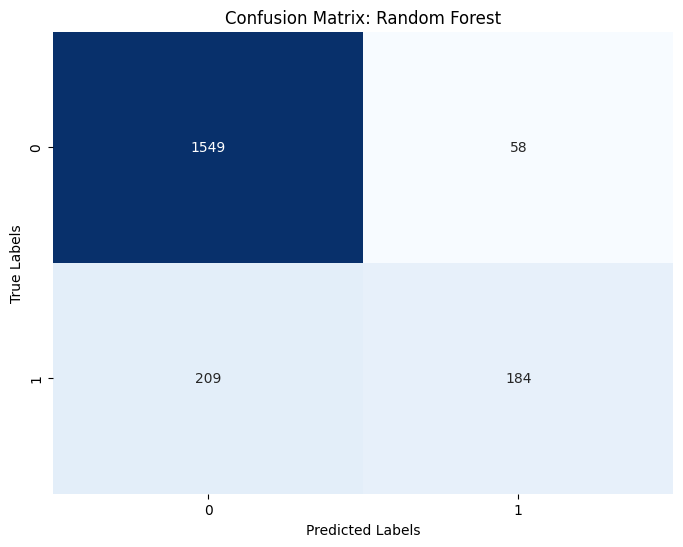

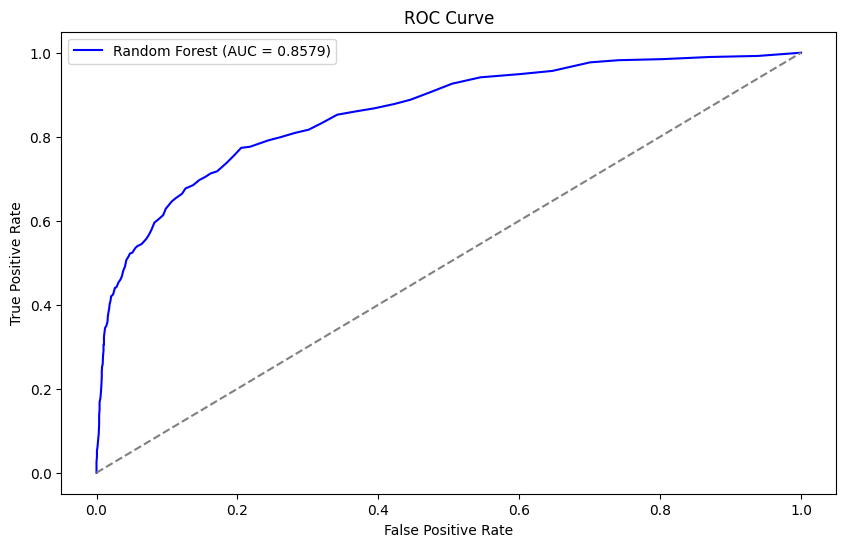

In [41]:
# Generate predictions
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)[:, 1]

# Calculate performance metrics
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_roc_auc = roc_auc_score(y_test, rf_pred_proba)

# Print performance metrics
print("Random Forest Performance Metrics:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1 Score: {rf_f1:.4f}")
print(f"ROC AUC: {rf_roc_auc:.4f}")

# Compute confusion matrix
conf_matrix_rf = confusion_matrix(y_test, rf_pred)

# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix: Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot ROC curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred_proba)

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'Random Forest (AUC = {rf_roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

####Decision Tree


Decision Tree Performance Metrics:
Accuracy: 0.7780
Precision: 0.4419
Recall: 0.4936
F1 Score: 0.4663
ROC AUC: 0.6706


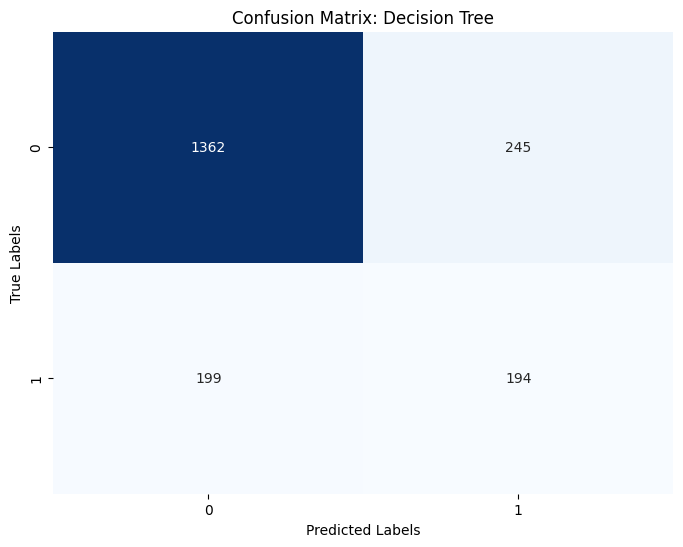

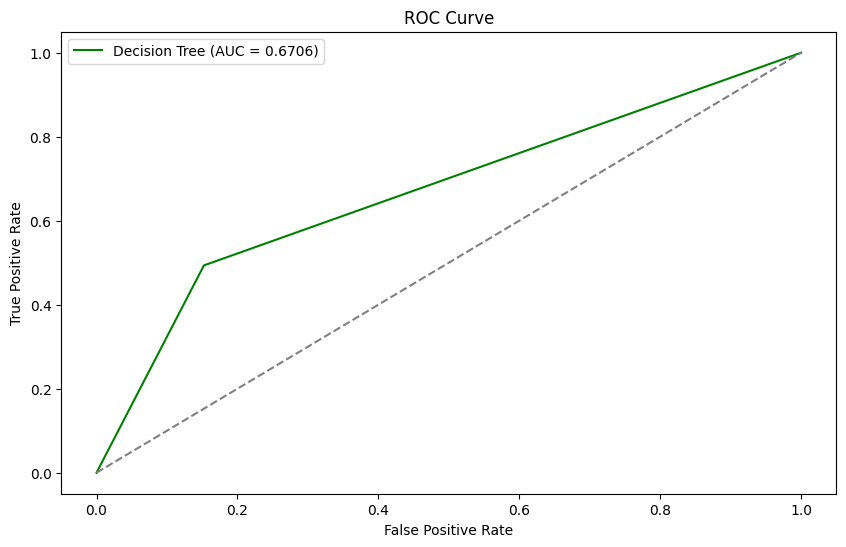

In [48]:
# Generate predictions
dt_pred = dt_clf.predict(X_test)
dt_pred_proba = dt_clf.predict_proba(X_test)[:, 1]

# Calculate performance metrics
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)
dt_roc_auc = roc_auc_score(y_test, dt_pred_proba)

# Print performance metrics
print("\nDecision Tree Performance Metrics:")
print(f"Accuracy: {dt_accuracy:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print(f"F1 Score: {dt_f1:.4f}")
print(f"ROC AUC: {dt_roc_auc:.4f}")

# Compute confusion matrix
conf_matrix_dt = confusion_matrix(y_test, dt_pred)

# Plot confusion matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix: Decision Tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot ROC curve for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_pred_proba)

plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, color='green', label=f'Decision Tree (AUC = {dt_roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

####SVC


SVC Performance Metrics:
Accuracy: 0.8560
Precision: 0.7692
Recall: 0.3817
F1 Score: 0.5102
ROC AUC: 0.8248


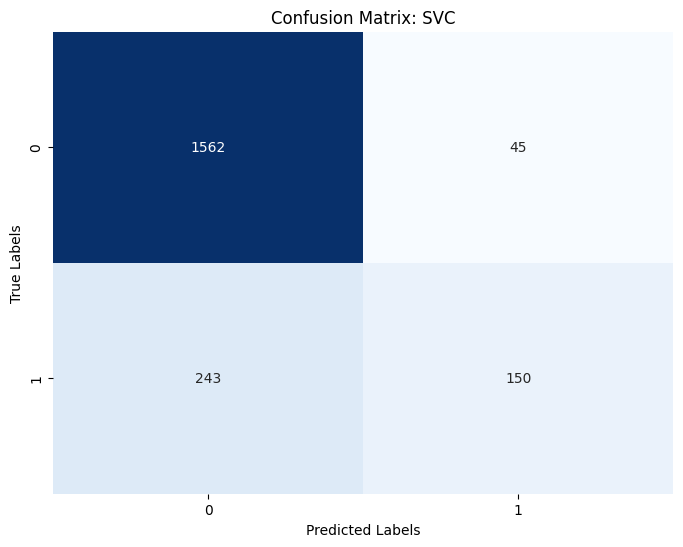

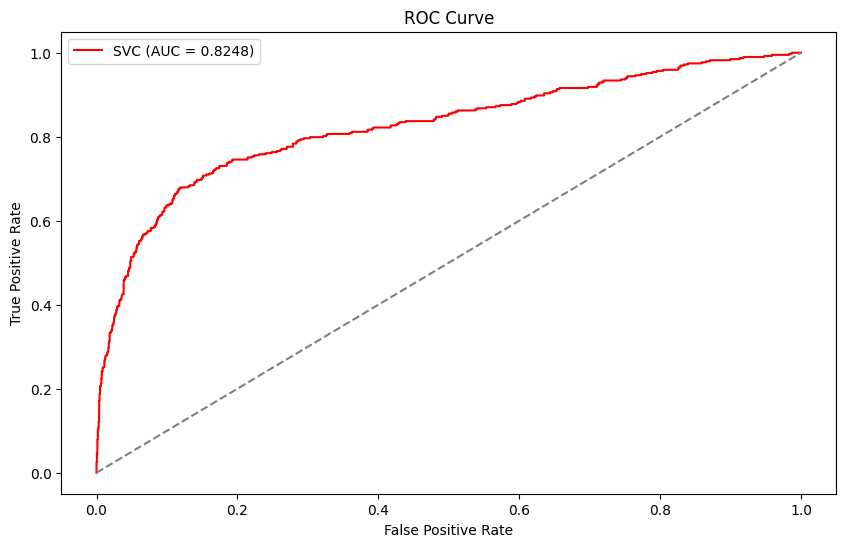

In [50]:
# Generate predictions
svc_pred = svc_clf.predict(X_test)
svc_pred_proba = svc_clf.predict_proba(X_test)[:, 1]

# Calculate performance metrics
svc_accuracy = accuracy_score(y_test, svc_pred)
svc_precision = precision_score(y_test, svc_pred)
svc_recall = recall_score(y_test, svc_pred)
svc_f1 = f1_score(y_test, svc_pred)
svc_roc_auc = roc_auc_score(y_test, svc_pred_proba)

# Print performance metrics
print("\nSVC Performance Metrics:")
print(f"Accuracy: {svc_accuracy:.4f}")
print(f"Precision: {svc_precision:.4f}")
print(f"Recall: {svc_recall:.4f}")
print(f"F1 Score: {svc_f1:.4f}")
print(f"ROC AUC: {svc_roc_auc:.4f}")

# Compute confusion matrix
conf_matrix_svc = confusion_matrix(y_test, svc_pred)

# Plot confusion matrix for SVC
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix: SVC')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot ROC curve for SVC
fpr_svc, tpr_svc, _ = roc_curve(y_test, svc_pred_proba)

plt.figure(figsize=(10, 6))
plt.plot(fpr_svc, tpr_svc, color='red', label=f'SVC (AUC = {svc_roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

###Heterogeneous Ensemble Model


Heterogeneous Ensemble Performance Metrics:
Accuracy: 0.8460
Precision: 0.6707
Recall: 0.4249
F1 Score: 0.5202
ROC AUC: 0.8349


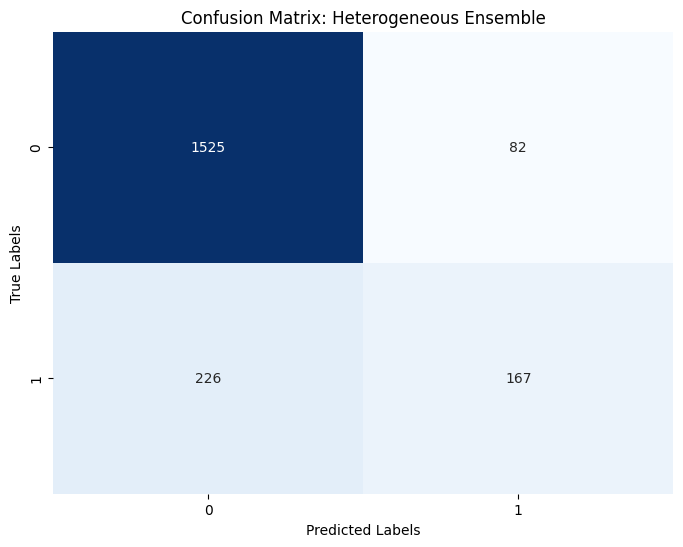

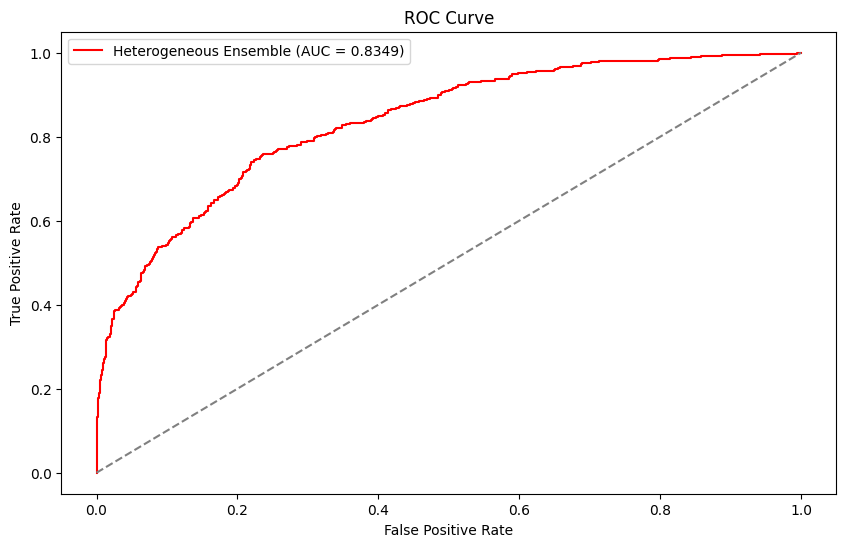

In [44]:
# Generate predictions
voting_pred = voting_clf.predict(X_test)
voting_pred_proba = voting_clf.predict_proba(X_test)[:, 1]

# Calculate performance metrics
voting_accuracy = accuracy_score(y_test, voting_pred)
voting_precision = precision_score(y_test, voting_pred)
voting_recall = recall_score(y_test, voting_pred)
voting_f1 = f1_score(y_test, voting_pred)
voting_roc_auc = roc_auc_score(y_test, voting_pred_proba)

# Print performance metrics
print("\nHeterogeneous Ensemble Performance Metrics:")
print(f"Accuracy: {voting_accuracy:.4f}")
print(f"Precision: {voting_precision:.4f}")
print(f"Recall: {voting_recall:.4f}")
print(f"F1 Score: {voting_f1:.4f}")
print(f"ROC AUC: {voting_roc_auc:.4f}")

# Compute confusion matrix
conf_matrix_voting = confusion_matrix(y_test, voting_pred)

# Plot confusion matrix for Heterogeneous Ensemble
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_voting, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix: Heterogeneous Ensemble')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot ROC curve for Heterogeneous Ensemble
fpr_voting, tpr_voting, _ = roc_curve(y_test, voting_pred_proba)

plt.figure(figsize=(10, 6))
plt.plot(fpr_voting, tpr_voting, color='red', label=f'Heterogeneous Ensemble (AUC = {voting_roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()